## Strength of a party
Strength of a party lies in converting voters into votes.  
To understand it, computed numbers votes for which a party contested and how much they gained.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline
plt.style.use('ggplot')

In [2]:
indata = pd.read_csv("Data/Tamil Nadu.csv")

In [3]:
indata.head()

,cid,cname,O.S.N.,Candidate,Party,EVM Votes,Postal Votes,Total Votes,PctVotes
0,1,Gummidipoondi,1,GOVINDARAJAN T.J,Dravida Munnetra Kazhagam,65291,0,65291,55.54
1,1,Gummidipoondi,2,DILLIY K.M,Desiya Murpokku Dravida Kazhagam,1422,0,1422,1.21
2,1,Gummidipoondi,3,NAGARAJ S,Bahujan Samaj Party,402,0,402,0.34
3,1,Gummidipoondi,4,USHA,Naam Tamilar Katchi,6221,0,6221,5.29
4,1,Gummidipoondi,5,GOWTHAM J,Anaithu Makkal Arasiyal Katchi,129,0,129,0.11


In [4]:
consta_votes = indata.groupby(['cname']).agg(votes = ('Total Votes', 'sum'))
consta_votes.reset_index(inplace=True)

In [6]:
party_votes = indata.loc[indata['Party'] != 'Independent'].groupby(['Party']).agg(TotalVotes=('Total Votes', 'sum'))
party_votes.sort_values(['TotalVotes', 'Party'], ascending=False, inplace=True)
party_votes.reset_index(inplace=True)
party_votes['CompetedVotes'] = 0
party_votes['CompetedConsta'] = 0

In [11]:
for idx, row in party_votes.iterrows():
    contested = indata.loc[indata['Party'] == row['Party']]['cname'].unique()
    votes = consta_votes.loc[consta_votes['cname'].isin(contested)]['votes'].sum()
    party_votes.loc[idx, 'CompetedVotes'] = votes
    party_votes.loc[idx, 'CompetedConsta'] = len(contested)
party_votes['PctVotes'] = party_votes['TotalVotes'] / party_votes['CompetedVotes']
party_votes.sort_values(['PctVotes'], ascending=False, inplace=True)
party_votes.head(12)

,Party,TotalVotes,CompetedVotes,CompetedConsta,PctVotes
0,Dravida Munnetra Kazhagam,11201897,24219823,188,0.462509
12,Indian Union Muslim League,133604,314216,3,0.425198
8,Communist Party of India,417629,987333,6,0.422987
9,Viduthalai Chiruthaigal Katchi,355088,839519,6,0.422966
4,Indian National Congress,1126158,2733610,25,0.411967
1,All India Anna Dravida Munnetra Kazhagam,9937688,24256958,191,0.409684
3,Pattali Makkal Katchi,1172376,3106318,23,0.377417
11,Communist Party of India (Marxist),212076,620184,6,0.341957
5,Bharatiya Janata Party,800113,2351409,20,0.340270
2,Naam Tamilar Katchi,1958056,29714685,234,0.065895


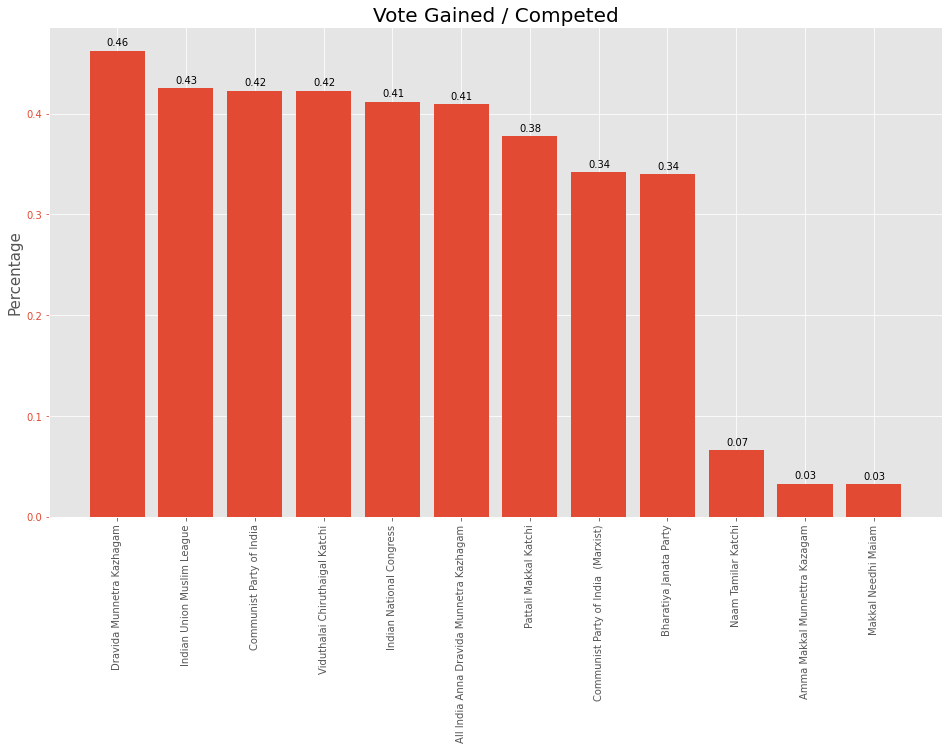

In [13]:
plot_data = party_votes.iloc[:12]
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(plot_data['Party'], plot_data['PctVotes'], color="C0")


ax.tick_params(axis="y", colors="C0")
ax.set_ylabel('Percentage', fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax.tick_params(axis="x", labelrotation=90)
ax.set_title("Vote Gained / Competed", 
             fontdict={'fontsize': 20, 'fontweight': 'medium'})

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + 0.25, p.get_height() + 0.005))
    
plt.show()

## Observations

- **Dravida Munnetra Kazhagam** DMK is realy strong, they competed in 188 Constituency and gained 46% of votes from there
- **Indian Union Muslim League, Communist Party of India, Viduthalai Chiruthaigal Katchi** gained 40+% of votes, we cannot call them realy strong because they competed in very few constituency. It doesn't mean if they compete in 100+ constituency they will win similar score. Their strength lies in picking the constituency where they are likely to win
- **Indian National Congress**, have scope for improvment, They competed in 25 place and won 40+% votes, they could compete in few more place and win similar score
- **Naam Tamilar Katchi, Amma Makkal Munnettra Kazagam & Makkal Needhi Maiam** competed in 234, 165 & 180 constituency respectively. Even though they have lot of votes but the win rate is extremely low. It shows there pressence is not felt in any part of Tamil Nadu. Long way for them to go.
    - Probably they should gain confidence from few constituency and then focus on rest of the Tamil Nadu